## 1. Dataset Overview
We use the amazon product review dataset for the analysis of  recommendation systems using collaborative filtering. The dataset includes the following parameters
* userId
* productId
* Rating
* timestamp

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import SVD, Reader, Dataset

### 1.1 Dataset description

In [2]:
df = pd.read_csv('ratings_Electronics.csv')

In [3]:
print("The length of the dataset is")
len(df)

The length of the dataset is


7824481

In [4]:
df.columns=['userId', 'productId','Rating','timestamp']

In [5]:
df.tail()

,userId,productId,Rating,timestamp
7824476,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824477,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824478,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824479,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200
7824480,A2G81TMIOIDEQQ,BT008V9J9U,5.0,1312675200


### 1.2 Dataset size reduction

In [6]:
data = df.head(1000000)
print("After taking only initial 1 lakh samples of the dataset")
len(data)

After taking only initial 1 lakh samples of the dataset


1000000

### 1.3 Dataset  Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   userId     1000000 non-null  object 
 1   productId  1000000 non-null  object 
 2   Rating     1000000 non-null  float64
 3   timestamp  1000000 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 30.5+ MB


In [8]:
data.describe()

,Rating,timestamp
count,1000000.000000,1.000000e+06
mean,3.973618,1.246846e+09
std,1.399741,1.100103e+08
min,1.000000,9.127296e+08
25%,3.000000,1.168301e+09
50%,5.000000,1.246666e+09
75%,5.000000,1.355184e+09
max,5.000000,1.406074e+09


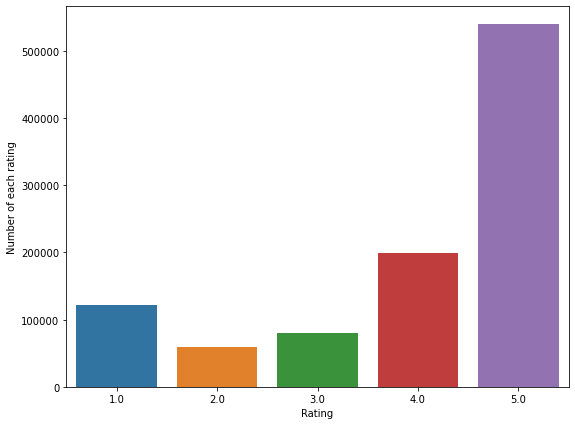

In [9]:
plt.figure(figsize=(9,7))
sns.countplot(x='Rating',data=data)
plt.xlabel('Rating')
plt.ylabel('Number of each rating')
plt.show()

In [10]:
users = data['userId'].unique()
print("The number of users in the dataset are", len(users))

The number of users in the dataset are 754152


In [11]:
products = data['productId'].unique()
print("The number of products in the dataset are", len(products))

The number of products in the dataset are 59633


In [12]:
ratings = data['Rating'].unique()
print("The number of ratings in the dataset are", len(ratings))

The number of ratings in the dataset are 5


## 2. SVD Implementation

In [14]:
from surprise import accuracy
from surprise.model_selection.validation import cross_validate
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise import SVD

### 2.1 Dataset preparation for surprise module

In [16]:
reader= Reader()
surprise_data=Dataset.load_from_df(data[['userId', 'productId','Rating']],reader)

In [17]:
from surprise.model_selection import train_test_split
trainset, testset= train_test_split(surprise_data,test_size=.25,random_state=10)

In [18]:
trainset= surprise_data.build_full_trainset()

### 2.2 SVD with n_factors=100

### 2.2.1 Model Training

In [19]:
import datetime
svd = SVD()
train_start_time=datetime.datetime.now()
resultant_matrix= svd.fit(trainset)
train_end_time=datetime.datetime.now()

print("Time taken to train SVD ",  (train_end_time - train_start_time).total_seconds(), " ms")


Time taken to train SVD  76.433173  ms


###  2.2.2 Evaluating Top n recommendations for each user

In [20]:
from collections import defaultdict
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


In [21]:
predictions = svd.test(testset)
top_1_recommendations = get_top_n(predictions, n=1)
top_5_recommendations = get_top_n(predictions, n=5)


### 2.2.3 Evaluating recommendation system on 30 Test Samples

In [22]:
sample_test_set= testset[0:30]
sample_test_set_df=pd.DataFrame(sample_test_set, columns=['userId', 'productId','Rating'])
print(sample_test_set_df)

            userId   productId  Rating
0   A2B951Z2GP1ZG3  B00019OWU4     5.0
1   A3UA6C6IP9JZ5F  B0000AKVJC     5.0
2   A3S0P52OUKQXGC  B00008WIX5     5.0
3    AUMLVWUBFCRJ2  B000AJIF4E     5.0
4   A1VVLV8OOPK15V  B000GASM4K     5.0
5   A2LDN3S9ZP4VRS  B0002CRVXK     2.0
6   A2KQLMYF81O4OT  B00009KHN1     1.0
7   A2EFLQM3E9ONXW  B000H72MMU     2.0
8   A3TVK8KG9OCGW2  B0007WK8MQ     5.0
9    AOKUF8CCC7987  B00009UU2Q     5.0
10  A2Z7IYVXKOB728  B00009RA60     1.0
11   AVNG1A2AFPVOU  B00001ZWXA     5.0
12  A2106AJ298C6VC  B00007E7JU     4.0
13  A203OCQQ12MAVT  B000068O16     5.0
14  A1WX3945M8PWU9  B00008SCFL     1.0
15  A10MINDY3117IK  B000AB2FR0     3.0
16  A23JUSR28JZQ1M  B00096ZT0G     5.0
17  A30F8WIJTLN6K6  B0007LFU9I     5.0
18  A35VXRTNFXKQ1R  B00001W0DH     5.0
19   A3PLAI506FE2D  B0000X5ZHU     5.0
20   A3A0FI1M71WNR  B00009R6TA     5.0
21  A36BBR77TNBIHW  B00064V6RG     5.0
22  A3HUVO505KK08J  B000001ON6     5.0
23  A3V72W6QKZW4VQ  B000E9U9GC     1.0
24  A3VAFEOIRXMHYJ  B000B

In [33]:
for uid,pid,r in sample_test_set:
    pred_start_time=datetime.datetime.now()
    prediction = svd.predict(uid=uid, iid=pid,r_ui =None)
    pred_end_time=datetime.datetime.now()
    top_1=[iid for (iid, _) in top_1_recommendations[uid]]
    top_5=[iid for (iid, _) in top_5_recommendations[uid]]
    top_1_acc=False
    top_5_acc=False
    if pid in top_1:
        top_1_acc=True
    if pid in top_5:
        top_5_acc=True
    
    print(" user: ",uid, "product ", pid, " predicted rating ",prediction.est, " actual rating", r, " Top-1 acc",top_1_acc," Top-5 acc ",  top_5_acc, "Pred_time ", (pred_end_time - pred_start_time).total_seconds() , "ms")
    print("Top-1 recommendations : ", top_1)
    print("Top-5 recommendations : ",top_5)
    print("\n")
    print("\n")
    print("\n")
        
    

 user:  A2B951Z2GP1ZG3 product  B00019OWU4  predicted rating  4.120120894820002  actual rating 5.0  Top-1 acc True  Top-5 acc  True Pred_time  0.000108 ms
Top-1 recommendations :  ['B00019OWU4']
Top-5 recommendations :  ['B00019OWU4']






 user:  A3UA6C6IP9JZ5F product  B0000AKVJC  predicted rating  4.429348462419323  actual rating 5.0  Top-1 acc True  Top-5 acc  True Pred_time  6e-05 ms
Top-1 recommendations :  ['B0000AKVJC']
Top-5 recommendations :  ['B0000AKVJC']






 user:  A3S0P52OUKQXGC product  B00008WIX5  predicted rating  4.510393134044508  actual rating 5.0  Top-1 acc True  Top-5 acc  True Pred_time  5.9e-05 ms
Top-1 recommendations :  ['B00008WIX5']
Top-5 recommendations :  ['B00008WIX5']






 user:  AUMLVWUBFCRJ2 product  B000AJIF4E  predicted rating  4.565503989221433  actual rating 5.0  Top-1 acc True  Top-5 acc  True Pred_time  5e-05 ms
Top-1 recommendations :  ['B000AJIF4E']
Top-5 recommendations :  ['B000AJIF4E']






 user:  A1VVLV8OOPK15V product  B000GASM4K  

### 2.2.4  Model Evaluation

In [37]:
pred_start_time=datetime.datetime.now()
predictions = svd.test(testset)
pred_end_time=datetime.datetime.now()
print("Time taken to predict  ",  (pred_end_time - pred_start_time).total_seconds(), " ms")

preds = predictions
print(preds)
accuracy.rmse(preds)

Time taken to predict   5.631959  ms


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



RMSE: 0.7936


0.7935876136487537

### 2.3 SVD with n_factors=50

### 2.3.1 Model Training

In [26]:
svd2 = SVD(n_factors=50)
train_start_time=datetime.datetime.now()
resultant_matrix= svd2.fit(trainset)
train_end_time=datetime.datetime.now()
print("Time taken to train SVD ",  (train_end_time - train_start_time).total_seconds(), " ms")


Time taken to train SVD  50.622703  ms


###  2.3.2 Evaluating Top n recommendations for each user

In [27]:
predictions = svd2.test(testset)
top_1_recommendations = get_top_n(predictions, n=1)
top_5_recommendations = get_top_n(predictions, n=5)

###  2.3.3 Evaluating recommendation system on 30 Test Samples

In [28]:
sample_test_set= testset[0:30]
sample_test_set_df=pd.DataFrame(sample_test_set, columns=['userId', 'productId','Rating'])
print(sample_test_set_df)

            userId   productId  Rating
0   A2B951Z2GP1ZG3  B00019OWU4     5.0
1   A3UA6C6IP9JZ5F  B0000AKVJC     5.0
2   A3S0P52OUKQXGC  B00008WIX5     5.0
3    AUMLVWUBFCRJ2  B000AJIF4E     5.0
4   A1VVLV8OOPK15V  B000GASM4K     5.0
5   A2LDN3S9ZP4VRS  B0002CRVXK     2.0
6   A2KQLMYF81O4OT  B00009KHN1     1.0
7   A2EFLQM3E9ONXW  B000H72MMU     2.0
8   A3TVK8KG9OCGW2  B0007WK8MQ     5.0
9    AOKUF8CCC7987  B00009UU2Q     5.0
10  A2Z7IYVXKOB728  B00009RA60     1.0
11   AVNG1A2AFPVOU  B00001ZWXA     5.0
12  A2106AJ298C6VC  B00007E7JU     4.0
13  A203OCQQ12MAVT  B000068O16     5.0
14  A1WX3945M8PWU9  B00008SCFL     1.0
15  A10MINDY3117IK  B000AB2FR0     3.0
16  A23JUSR28JZQ1M  B00096ZT0G     5.0
17  A30F8WIJTLN6K6  B0007LFU9I     5.0
18  A35VXRTNFXKQ1R  B00001W0DH     5.0
19   A3PLAI506FE2D  B0000X5ZHU     5.0
20   A3A0FI1M71WNR  B00009R6TA     5.0
21  A36BBR77TNBIHW  B00064V6RG     5.0
22  A3HUVO505KK08J  B000001ON6     5.0
23  A3V72W6QKZW4VQ  B000E9U9GC     1.0
24  A3VAFEOIRXMHYJ  B000B

In [29]:
for uid,pid,r in sample_test_set:
    prediction = svd2.predict(uid=uid, iid=pid,r_ui =None)
    top_1=[iid for (iid, _) in top_1_recommendations[uid]]
    top_5=[iid for (iid, _) in top_5_recommendations[uid]]
    top_1_acc=False
    top_5_acc=False
    if pid in top_1:
        top_1_acc=True
    if pid in top_5:
        top_5_acc=True
    
    print(" user: ",uid, "product ", pid, " predicted rating ",prediction.est, " actual rating", r, " Top-1 acc",top_1_acc," Top-5 acc ",  top_5_acc)
    print("Top-1 recommendations : ", top_1)
    print("Top-5 recommendations : ",top_5)
    print("\n")
    print("\n")
    print("\n")
        

 user:  A2B951Z2GP1ZG3 product  B00019OWU4  predicted rating  4.34599284105623  actual rating 5.0  Top-1 acc True  Top-5 acc  True
Top-1 recommendations :  ['B00019OWU4']
Top-5 recommendations :  ['B00019OWU4']






 user:  A3UA6C6IP9JZ5F product  B0000AKVJC  predicted rating  4.431102542737964  actual rating 5.0  Top-1 acc True  Top-5 acc  True
Top-1 recommendations :  ['B0000AKVJC']
Top-5 recommendations :  ['B0000AKVJC']






 user:  A3S0P52OUKQXGC product  B00008WIX5  predicted rating  4.371257083404158  actual rating 5.0  Top-1 acc True  Top-5 acc  True
Top-1 recommendations :  ['B00008WIX5']
Top-5 recommendations :  ['B00008WIX5']






 user:  AUMLVWUBFCRJ2 product  B000AJIF4E  predicted rating  4.50014331196043  actual rating 5.0  Top-1 acc True  Top-5 acc  True
Top-1 recommendations :  ['B000AJIF4E']
Top-5 recommendations :  ['B000AJIF4E']






 user:  A1VVLV8OOPK15V product  B000GASM4K  predicted rating  4.766089608413684  actual rating 5.0  Top-1 acc True  Top-5 acc  True

### 2.3.4  Model Evaluation


In [30]:
pred_start_time=datetime.datetime.now()
predictions = svd2.test(testset)
pred_end_time=datetime.datetime.now()
print("Time taken to predict  ",  (train_end_time - train_start_time).total_seconds(), " ms")

preds = predictions
print(preds)
accuracy.rmse(preds)

Time taken to predict   50.622703  ms


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



RMSE: 0.9166


0.9166345712714397